In [1]:
from mapping import Map
from particle_filter import Particle_Filter
from sensor import Lidar, Encoder, FOG, StereoCamera
from transform import lidar2world
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
n = 1
lidar = Lidar('lidar.csv')
encoder = Encoder('encoder.csv')
fog = FOG('fog.csv')
camera = StereoCamera('left.csv', 'right.csv')
grid_map = Map(0.5, -100, 1400, -1200, 100)
particle_filter = Particle_Filter(n)
trajactory = np.zeros((2, fog.length))
particle_max = None

In [5]:
for i in range(fog.length):
    speed_v = encoder.get_data()
    speed_w = fog.get_data()
    particle_filter.predict(speed_v, speed_w, fog.tau)
    
    if fog.time > encoder.time:
        lidar_data = lidar.get_data()

        particle_max = particle_filter.update(lidar_data, grid_map)
        trajactory[:, i] = particle_max[:2]

        grid_map.update_map(particle_max, lidar_data)

        encoder.update_idx()
        lidar.update_idx()
        break
    
    fog.update_idx()

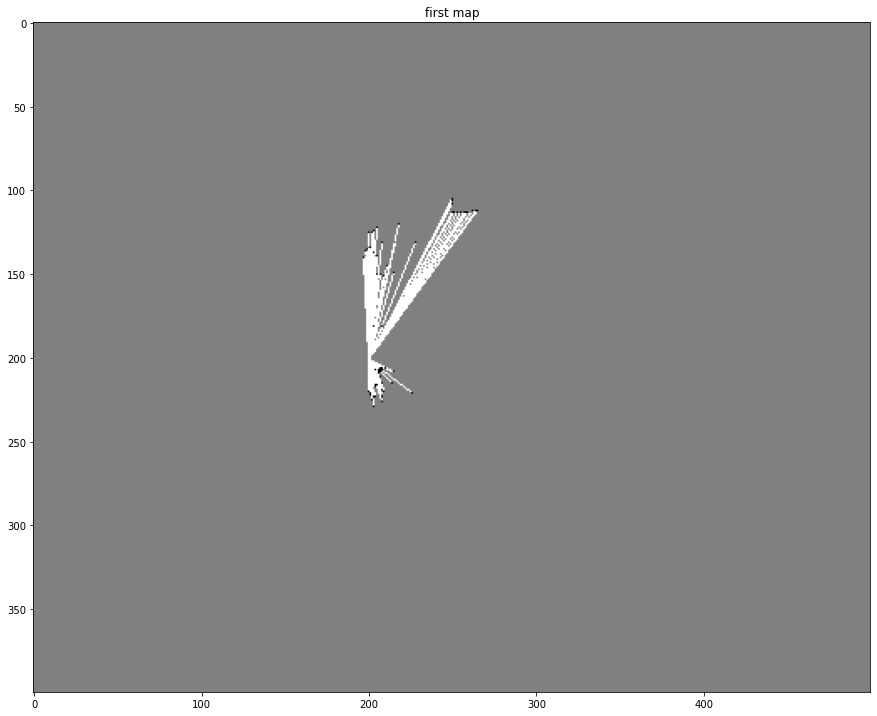

In [8]:
map_printed = np.zeros_like(grid_map.grid_map)
map_printed[grid_map.grid_map > 0] = 0
map_printed[grid_map.grid_map < 0] = 1
map_printed[grid_map.grid_map == 0] = 0.5

map_printed = np.flip(map_printed.T, axis=0)[:400,:500]

fig, ax = plt.subplots(figsize=(15,13))
ax.set_title(f"first map")
ax.imshow(map_printed, cmap="gray", vmin=0, vmax=1)
fig.savefig(f"first map.png")